# 4.0 Knn

## Import libraries

In [2]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [18]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram, plot_evaluations

In [4]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.utils.paths import references_dir
from src.utils.metrics import display_and_plot_all_metrics, calculate_metrics


## Set up

In [5]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [6]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_FINAL_CSV_PATH = data_dir("processed", "df_wine_complete.csv")

print(f"{WINES_FINAL_CSV_PATH}")

c:\Users\cvigo\data-projects\proyecto-final-vinos\vinos-corderhouse\data\processed\df_wine_complete.csv


In [7]:
df_wines = pd.read_csv(WINES_FINAL_CSV_PATH)

In [8]:
df_wines.sample(10)

,quality_high,body_2,body_3,body_4,body_5,style_red,style_white,region_Otras,region_Priorato,region_Rias Baixas,region_Ribera del Duero,region_Rioja,region_Toro,region_Vino de Espana,PC1,PC2,PC3,PC4,PC5,PC6,PC7
1515,0,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.414546,0.656293,-0.401374,-0.225787,0.036383,0.103100,-0.063581
5886,1,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.031091,-0.478788,-0.130023,-0.134913,-0.244149,0.147417,-0.163454
2993,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0.110091,-0.151791,-0.132418,0.406093,0.011516,-0.220262,-0.045257
3520,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0.031966,-0.598766,-0.050681,-0.129881,0.233009,-0.066480,0.314425
2822,0,0,0,1,0,0,1,0,1,0,0,0,0,0,-0.678706,0.880164,0.100522,0.004261,-0.058495,0.031795,0.153832
1477,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0.313225,-0.212036,-0.321683,-0.395229,-0.241165,0.061215,0.160517
5709,0,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.154579,0.242280,0.160338,-0.164265,0.034777,0.234965,-0.021951
302,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1.098189,0.114899,0.393812,-0.525160,0.357100,0.340671,0.080588
239,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0.425049,-0.019810,-0.454098,-0.138813,0.206648,-0.019961,0.094199
3402,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0.184743,-0.016506,0.150304,-0.191510,0.067101,-0.057958,-0.117325


In [39]:
df_wines[[ "body_2", "quality_high"]]

,body_2,quality_high
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
6062,0,1
6063,0,0
6064,0,1
6065,0,1


# Preparamos los datos

In [10]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir
X = df_wines.drop(columns=["quality_high"])
y = df_wines.quality_high #Defino el Target

In [11]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
X_train.shape, X_test.shape

((4246, 20), (1821, 20))

# KNN

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
y_train_pred = knn.fit(X_train,y_train) 

In [13]:
y_test_pred = knn.predict(X_test) #Prediccion en Test

## Metricas

# Metricas: 

### Metricas calculadas

,precision,f1,recall,roc_auc,accuracy
value,0.75,0.73,0.72,0.69,0.67


### Grafico de confusion matrix: 

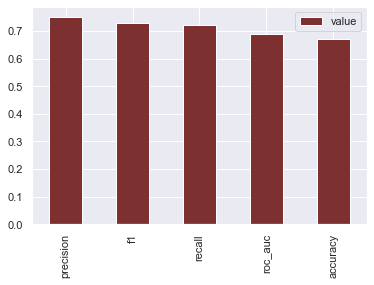

<Figure size 720x720 with 0 Axes>

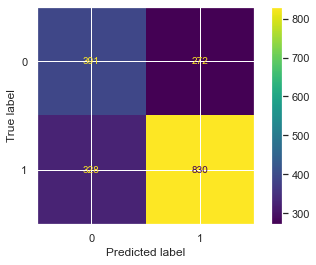

### Grafico de roc: 

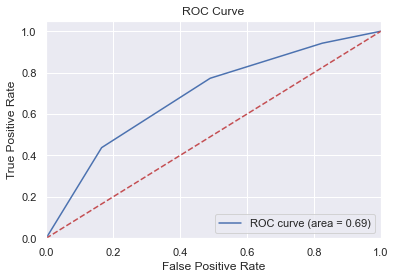

In [60]:
display_and_plot_all_metrics(knn,X_test,y_test,y_test_pred)

# Hypertuning de Parámetros

En las metricas vamos a priorizar la metrica de precision ya que queremos reducir los falsos positivos porque eso implica que lso vinos de baja calidad sean clasificados como de baja calidad, y cuando se exporten puede generar malestar en los clientes y baja fidelidad.

In [25]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
model = BayesSearchCV(KNeighborsClassifier(),
                      hyperparameters,
                      scoring='precision', 
                      n_points= 5,
                      n_iter= 30,
                      cv= 5,
                      verbose = 2,
                      n_jobs=6,
                      random_state= 88)


In [26]:
model.fit(X_train, y_train)
clf = model.best_estimator_
y_test_pred = pd.Series(clf.predict(X_test), index=X_test.index)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


# Metricas: 

### Metricas calculadas

,precision,f1,recall,roc_auc,accuracy
value,0.75,0.73,0.72,0.72,0.67


### Grafico de confusion matrix: 

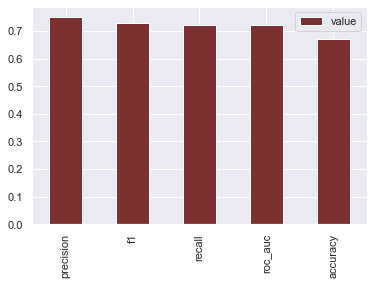

<Figure size 720x720 with 0 Axes>

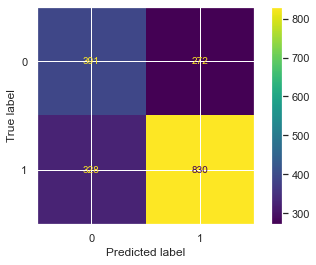

### Grafico de roc: 

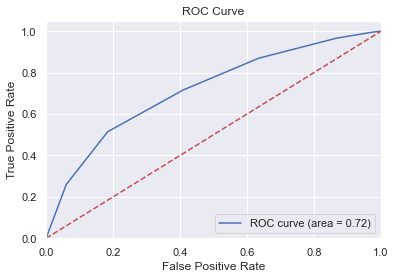

In [59]:
display_and_plot_all_metrics(clf,X_test,y_test,y_test_pred)

In [ ]:
calculate_metrics(clf,X_test,y_test,y_test_pred)